In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('final_internship_data.csv')

df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [3]:
#drop nulls
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  object 
 2   Driver Name        499995 non-null  object 
 3   Car Condition      499995 non-null  object 
 4   Weather            499995 non-null  object 
 5   Traffic Condition  499995 non-null  object 
 6   key                499995 non-null  object 
 7   fare_amount        499995 non-null  float64
 8   pickup_datetime    499995 non-null  object 
 9   pickup_longitude   499995 non-null  float64
 10  pickup_latitude    499995 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    499995 non-null  int64  
 14  hour               499995 non-null  int64  
 15  day                499995 non-null  int64  
 16  month  

In [4]:
#check duplicates
duplicates = df.duplicated()
duplicates_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [5]:
#display number of trips per user
trips_per_user = df['User ID'].value_counts()
print(trips_per_user)

User ID
KHVrEVlD    1
OoKo64GB    1
Phl9pRbO    1
Gg8lXxrJ    1
wVg86OTk    1
           ..
M8lPpDO2    1
4NtMOqM1    1
sJHWgXSJ    1
TwGHXQ7C    1
qGKn4Um5    1
Name: count, Length: 499995, dtype: int64


In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['minute'] = df['pickup_datetime'].dt.minute

print(df)

         User ID          User Name       Driver Name Car Condition Weather  \
0       KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1       lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2       gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3       9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4       8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   
...          ...                ...               ...           ...     ...   
499995  er7Luy6J       Morgan Smith   Gabriel Coleman           Bad   rainy   
499996  FWDZu9NA     Dillon Jackson    Larry Richards     Very Good   rainy   
499997  QZIMcpLZ  Michael Rodriguez    Lonnie Santana           Bad   rainy   
499998  AD72Uwmn       Deborah Soto      Emily Rivera          Good  stormy   
499999  qGKn4Um5         Eric Jones        Julie King     Very Good   sunny   

        Traffic Condition                          

In [7]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


In [8]:
#drop not needed columns
df = df.drop(columns=['User ID','User Name','Driver Name','key','pickup_datetime'])

In [9]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


In [10]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Car Condition', 'Weather', 'Traffic Condition']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,3,4,0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,1,0,2,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,0,2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,3,2,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,0,2,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


In [11]:
df.describe()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,1.501225,1.998988,0.999444,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145,29.553972
std,1.118552,1.413478,0.816600,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548,17.333130
min,0.000000,0.000000,0.000000,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593,0.000000
25%,1.000000,1.000000,0.000000,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721,14.000000
50%,2.000000,2.000000,1.000000,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442,30.000000
75%,3.000000,3.000000,2.000000,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769,45.000000
max,3.000000,4.000000,2.000000,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593,59.000000


In [12]:
#count all fare amount that is negative
negative_fair_count = (df['fare_amount'] < 0).sum()
print(f"Number of negative fair amounts: {negative_fair_count}")

#display them
negative_fares = df[df['fare_amount'] < 0]
print("Negative fare amounts:")
print(negative_fares[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

Number of negative fair amounts: 21
Negative fare amounts:
        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
2039           -2.9         -1.287869         0.709363          -1.287855   
2486           -2.5         -1.291544         0.710709          -1.291540   
13032          -3.0         -1.291457         0.711060          -1.291472   
28839          -2.5         -1.287796         0.709449           0.000000   
36722          -2.5         -1.290709         0.711922          -1.290672   
42337          -5.0         -1.291386         0.711326          -1.291209   
56748          -5.0         -1.291191         0.711104          -1.291216   
58937         -44.9         -1.289294         0.711639          -1.285898   
97838          -3.0         -1.290030         0.711505          -1.290059   
102938         -2.9         -1.291034         0.711805          -1.291080   
165147         -2.5         -1.291232         0.711634          -1.291231   
179311         -3

In [13]:
#check outliers

def outlier_check():
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers in {column}:")
        print(outliers.shape[0])


outlier_check()

Outliers in fare_amount:
43329
Outliers in pickup_longitude:
33965
Outliers in pickup_latitude:
23701
Outliers in dropoff_longitude:
35805
Outliers in dropoff_latitude:
30748
Outliers in passenger_count:
56526
Outliers in hour:
0
Outliers in day:
0
Outliers in month:
0
Outliers in weekday:
0
Outliers in year:
0
Outliers in jfk_dist:
59285
Outliers in ewr_dist:
28380
Outliers in lga_dist:
22539
Outliers in sol_dist:
18610
Outliers in nyc_dist:
21940
Outliers in distance:
41925
Outliers in bearing:
0


In [14]:
# Fare: remove negatives, clip extreme high
df = df[df['fare_amount'] > 0]
df['fare_amount'] = df['fare_amount'].clip(upper=100)  # Optional cap (adjust as needed)

# Distance-related features (clip top 99th percentile)
distance_features = ['distance', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']
for col in distance_features:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)


# Valid passenger count: 1 to 6
df = df[df['passenger_count'].between(1, 6)]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,3,4,0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,1,0,2,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,0,2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,3,2,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,0,2,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


## EDA

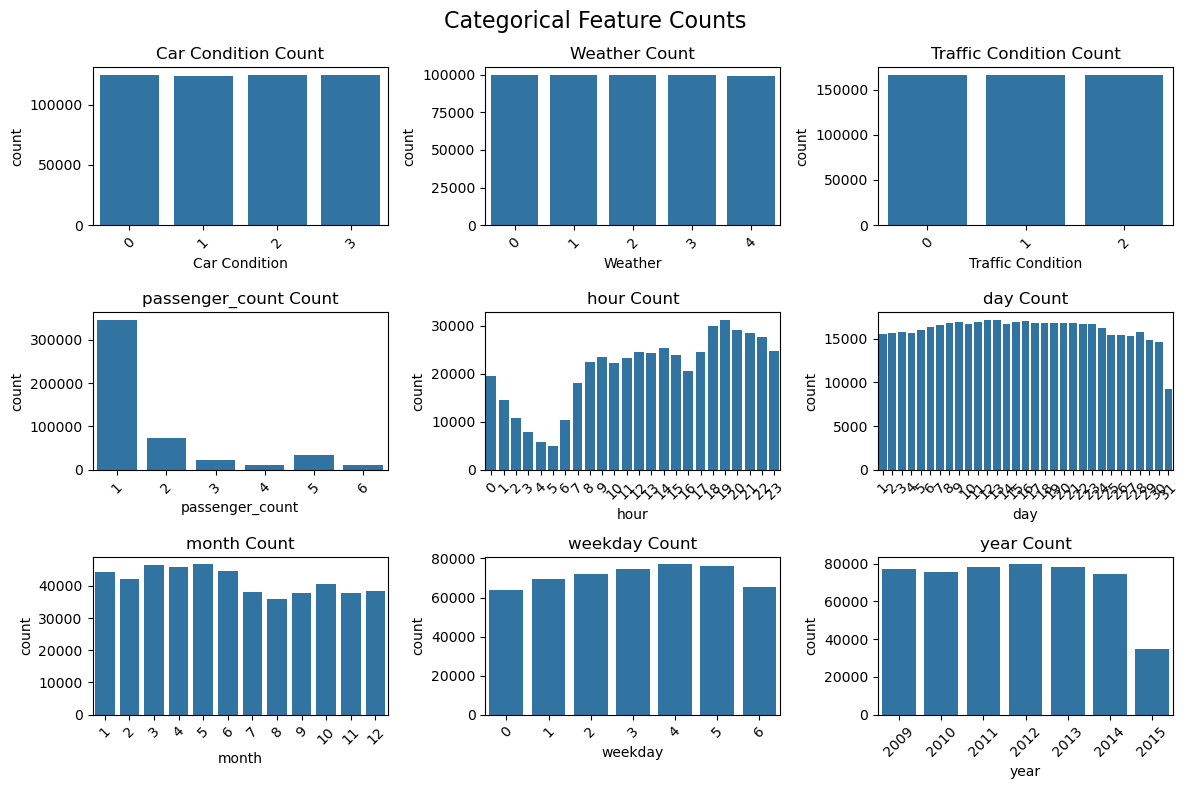

In [17]:
categorical_cols = ['Car Condition', 'Weather', 'Traffic Condition', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year']

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'{col} Count')
    ax.tick_params(axis='x', rotation=45)
plt.suptitle("Categorical Feature Counts", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#Are most cars in good condition?
df['Car Condition'].value_counts()

Car Condition
Very Good    125310
Bad          124977
Good         124967
Excellent    124741
Name: count, dtype: int64

In [ ]:
#What is the most common weather condition during trips?
df['Weather'].value_counts()

Weather
sunny     100433
cloudy    100060
rainy      99971
stormy     99955
windy      99576
Name: count, dtype: int64

In [ ]:
#Which traffic condition occurs most frequently?
df['Traffic Condition'].value_counts()

Traffic Condition
Congested Traffic    166846
Dense Traffic        166581
Flow Traffic         166568
Name: count, dtype: int64

In [ ]:
#Which year has the highest number of trips?
df['year'].value_counts()

year
2012    80222
2011    79528
2013    78033
2009    77002
2010    75791
2014    74608
2015    34811
Name: count, dtype: int64

In [ ]:
#What is the most popular day for trips?
df['weekday'].value_counts()

weekday
Friday       77224
Saturday     76212
Thursday     74776
Wednesday    72230
Tuesday      69929
Sunday       65387
Monday       64237
Name: count, dtype: int64

In [ ]:
#Which month has the highest number of trips?
df['month'].value_counts()

month
5     46733
3     46714
4     45959
6     44827
1     44547
2     42454
10    40551
12    38476
7     38127
9     37979
11    37757
8     35871
Name: count, dtype: int64

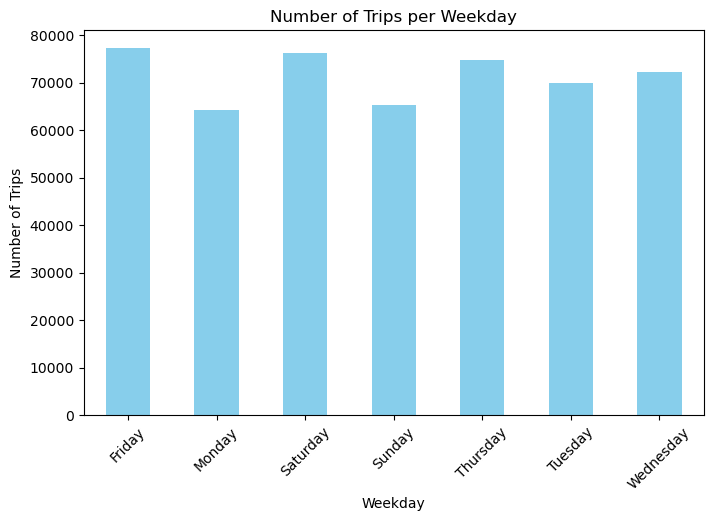

In [ ]:
weekday_counts = df['weekday'].value_counts().sort_index()

plt.figure(figsize=(8,5))
weekday_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Weekday')
plt.xticks(rotation=45)
plt.show()

                        mean   count
Traffic Condition                   
Congested Traffic  11.390549  166846
Dense Traffic      11.367565  166581
Flow Traffic       11.316378  166568


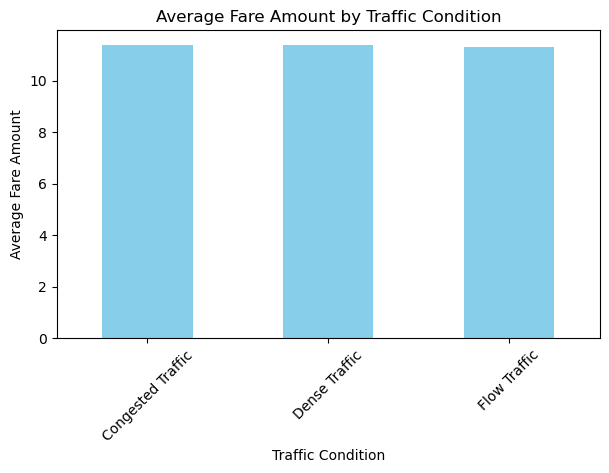

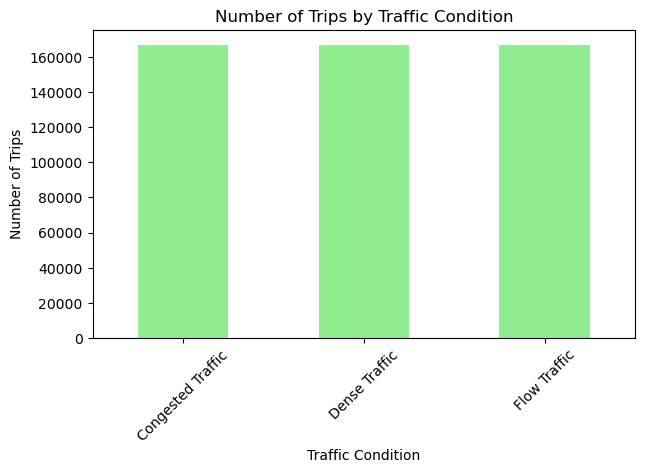

In [ ]:
#What is the average fare amount and number of trips for each traffic condition?
agg_fare = df.groupby('Traffic Condition')['fare_amount'].agg(['mean', 'count'])

print(agg_fare)
# Plot for average fare amount
agg_fare['mean'].plot(kind='bar', color='skyblue', figsize=(7,4))
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Traffic Condition')
plt.xticks(rotation=45)
plt.show()

# Plot for number of trips
agg_fare['count'].plot(kind='bar', color='lightgreen', figsize=(7,4))
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Traffic Condition')
plt.xticks(rotation=45)
plt.show()


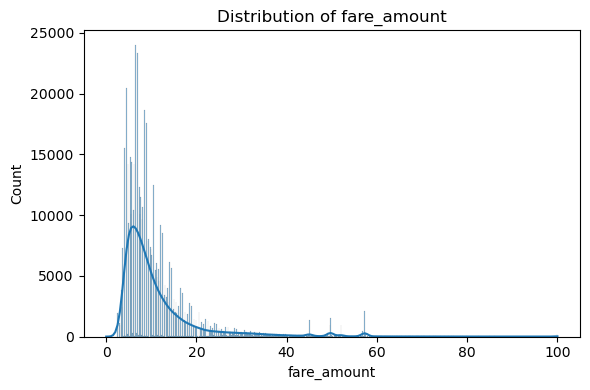

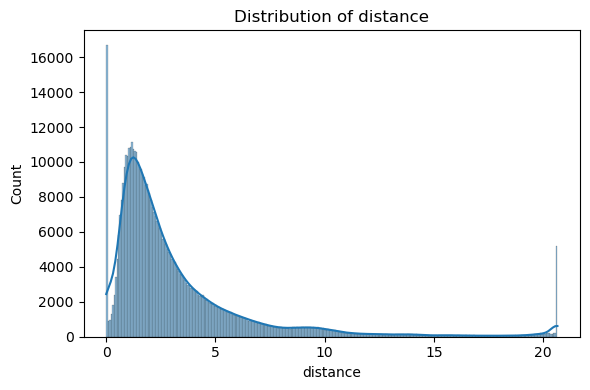

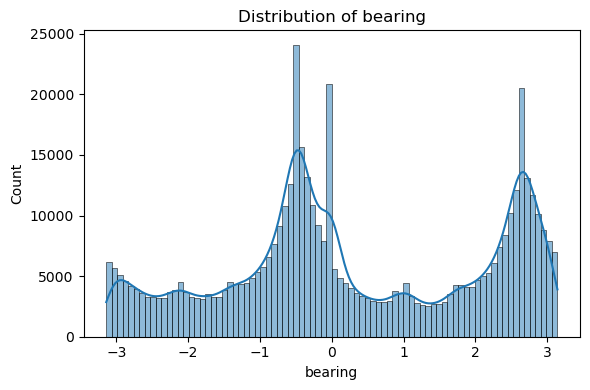

In [18]:
numeric_cols = ['fare_amount', 'distance', 'bearing']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


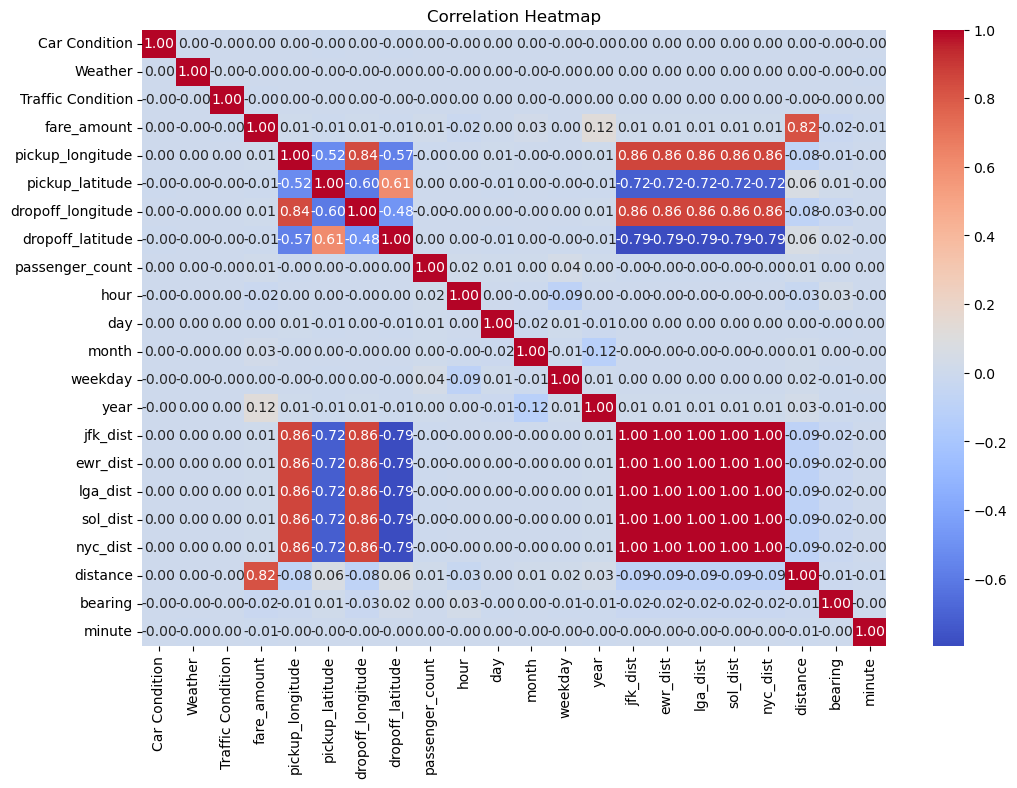

In [19]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




In [20]:
corr

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
Car Condition,1.000000,0.000654,-0.001230,0.003060,0.000860,-0.003650,0.001138,-0.002823,0.001174,-0.001366,0.000804,0.001506,-0.000508,-0.000017,0.002057,0.002063,0.002062,0.002062,0.002063,0.002282,-0.000681,-0.000838
Weather,0.000654,1.000000,-0.001835,-0.000503,0.000673,-0.001246,-0.000379,-0.000900,0.000781,-0.001096,0.000051,-0.000502,-0.001383,0.000032,0.000076,0.000075,0.000080,0.000074,0.000075,0.000090,-0.002237,-0.003940
Traffic Condition,-0.001230,-0.001835,1.000000,-0.002724,0.001799,-0.001032,0.002339,-0.000380,-0.000002,0.000762,0.000598,0.000692,-0.000414,0.000191,0.001460,0.001456,0.001452,0.001456,0.001455,-0.001480,-0.001903,0.001712
fare_amount,0.003060,-0.000503,-0.002724,1.000000,0.008281,-0.007380,0.008403,-0.007177,0.013878,-0.019707,0.002013,0.025129,0.003477,0.118839,0.006862,0.008605,0.007920,0.008553,0.008715,0.824643,-0.024540,-0.009307
pickup_longitude,0.000860,0.000673,0.001799,0.008281,1.000000,-0.521620,0.840025,-0.571002,-0.002601,0.000230,0.006289,-0.000587,-0.000477,0.005520,0.861761,0.861767,0.861761,0.861766,0.861765,-0.077923,-0.014944,-0.001150
pickup_latitude,-0.003650,-0.001246,-0.001032,-0.007380,-0.521620,1.000000,-0.604542,0.611671,0.001661,0.002642,-0.005157,0.002973,-0.003479,-0.007236,-0.720678,-0.720661,-0.720678,-0.720664,-0.720665,0.061072,0.012426,-0.000332
dropoff_longitude,0.001138,-0.000379,0.002339,0.008403,0.840025,-0.604542,1.000000,-0.483749,-0.001866,-0.001007,0.004104,-0.001252,0.001067,0.007510,0.862246,0.862260,0.862249,0.862257,0.862256,-0.079852,-0.025439,-0.000783
dropoff_latitude,-0.002823,-0.000900,-0.000380,-0.007177,-0.571002,0.611671,-0.483749,1.000000,0.001552,0.002470,-0.006562,0.003109,-0.003256,-0.008930,-0.794639,-0.794640,-0.794649,-0.794636,-0.794637,0.064144,0.021455,-0.001153
passenger_count,0.001174,0.000781,-0.000002,0.013878,-0.002601,0.001661,-0.001866,0.001552,1.000000,0.015928,0.005497,0.004675,0.037498,0.004969,-0.003161,-0.003155,-0.003139,-0.003154,-0.003151,0.012869,0.001615,0.002238
hour,-0.001366,-0.001096,0.000762,-0.019707,0.000230,0.002642,-0.001007,0.002470,0.015928,1.000000,0.002308,-0.003120,-0.088816,0.002225,-0.001435,-0.001511,-0.001504,-0.001490,-0.001501,-0.031161,0.031485,-0.001813


fare_amount is strongly correlated with distance.

pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are highly correlated with distance-related columns (jfk_dist, ewr_dist, ...)indicating GPS-based distances are effective predictors.

Features like Weather, Car Condition, and Traffic Condition have very weak correlations with fare, suggesting they may not significantly influence fare prediction.

The year has a moderate correlation with fare_amount (0.12), perhaps due to inflation or changing fare policies.



In [21]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'minute'],
      dtype='object')